<a href="https://colab.research.google.com/github/speccy-benji/speedtest/blob/master/speedtest_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# Set up base dataframe
First load all the rows into a json object
<br>Then create dataframe, convert timestamp colum to a datetime type
<br>Finally index on timestamp

In [0]:
with open('/gdrive/My Drive/data/speedtest/speedtest.json', 'r') as infile:
  data = [pd.io.json.loads(line) for line in infile]
df = pd.io.json.json_normalize(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
#convert from bits to Mbs
data_cols = ['upload', 'download']
df[data_cols]=df[data_cols]/1000000

In [3]:
print(df.head())
print(df.describe())
print(df.dtypes)

                                    upload  download    ping
timestamp                                                   
2019-11-01 18:15:04.044322+00:00  1.051673  1.597251  36.113
2019-11-01 21:15:03.071525+00:00  1.010771  1.403172  72.959
2019-11-02 00:15:03.069813+00:00  1.174640  3.743686  31.078
2019-11-02 03:15:03.084344+00:00  1.177159  3.744858  33.369
2019-11-02 06:15:02.730412+00:00  1.233261  3.715765  29.641
          upload   download        ping
count  73.000000  73.000000   73.000000
mean    1.106772   3.413320   78.432274
std     0.139249   0.621954  129.996191
min     0.505031   0.330980   29.172000
25%     1.098859   3.426785   30.150000
50%     1.142247   3.539040   32.093000
75%     1.179921   3.579393   34.594000
max     1.234203   4.368351  527.796000
upload      float64
download    float64
ping        float64
dtype: object


Do some visualisation

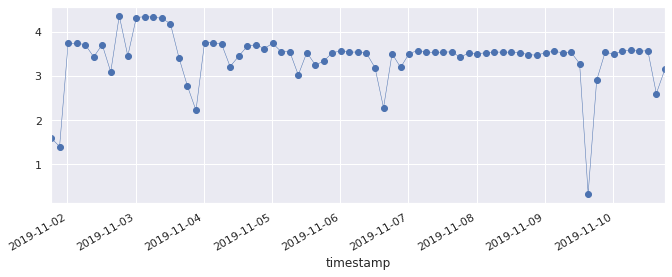

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
df['download'].plot(marker='o', linewidth=0.5)

Resample a daily average speed and plot that along with the 3 hourly measurememts
<br> also add in guaranteed min speed

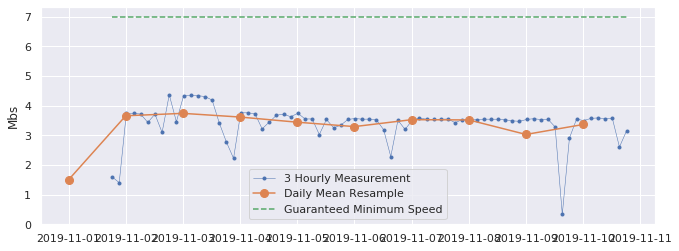

In [5]:
data_cols = ['download', 'upload']
df_daily_mean = df[data_cols].resample("D").mean()
df['minimum'] = 7.0
# Plot
fig, ax = plt.subplots()
ax.plot(df['download'],
marker='.', linestyle='-', linewidth=0.5, label='3 Hourly Measurement')
ax.plot(df_daily_mean['download'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.plot(df['minimum'],
linestyle='dashed', label='Guaranteed Minimum Speed')
ax.set_ylabel('Mbs')
ax.legend();

Look at values by hour

In [36]:
df['hour']=df.index.hour
df_hourly = df.pivot_table(values='download', index='hour',aggfunc=('mean', 'max', 'min', 'std'))
print(df_hourly)

           max      mean       min       std
hour                                        
0     4.328818  3.687116  3.495554  0.265280
3     4.347590  3.687684  3.532890  0.261972
6     4.338435  3.676525  3.532083  0.259414
9     4.307500  3.520886  3.026162  0.347543
12    4.189343  3.558068  3.189471  0.284601
15    3.676000  2.859601  0.330980  1.054777
18    4.368351  3.227665  1.597251  0.723703
21    3.625169  3.109647  1.403172  0.772192


Better still, let's do a boxplot - can do this from the orig dataframe


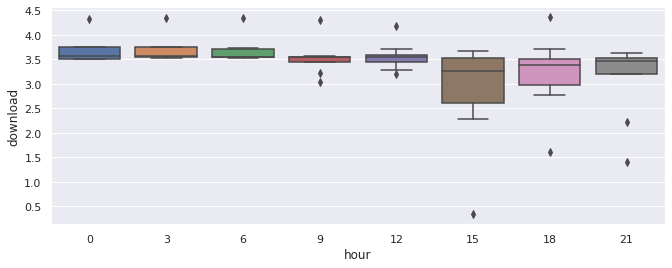

In [18]:
ax = sns.boxplot(x="hour", y="download", data=df)

What about by day?

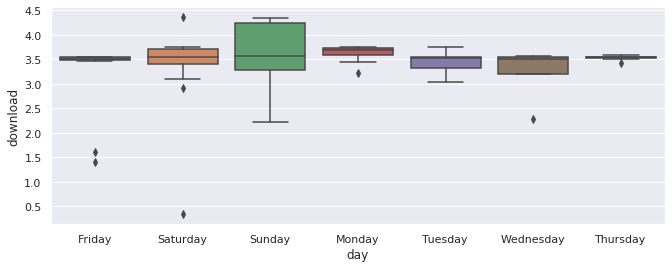

In [24]:
df['day'] = df.index.day_name()
ax = sns.boxplot(x='day', y='download', data=df)

try a scatterplot

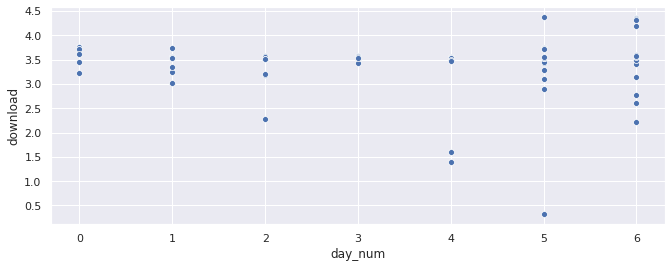

In [35]:
df['day_num']=df.index.dayofweek
ax = sns.scatterplot(x='day_num',y='download', data=df)